In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

## L2 Files 

In [2]:
border = 160

dd = '../L1-L2_files'

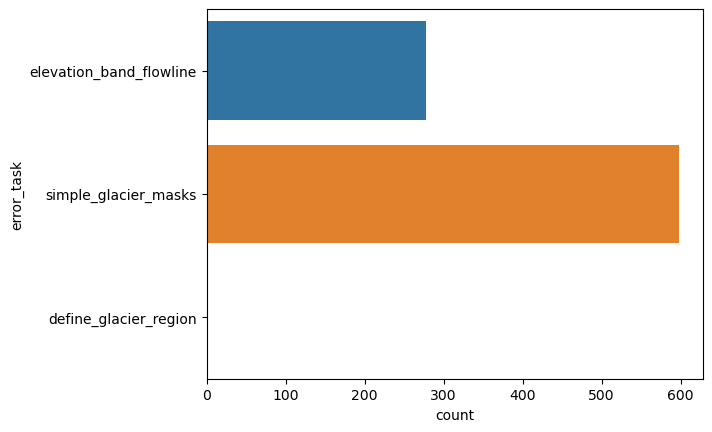

0.04852234337715137


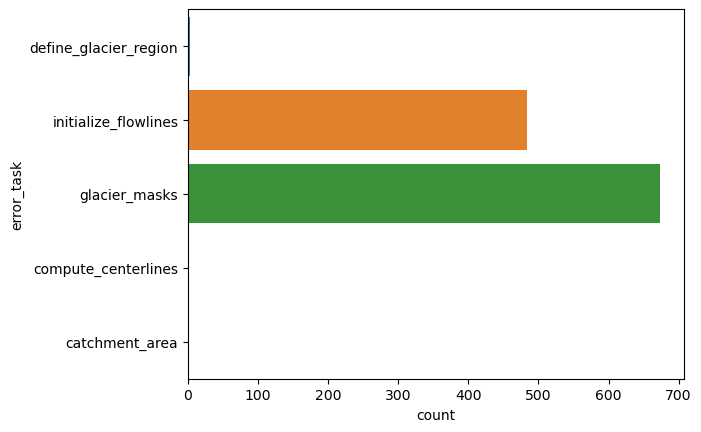

0.12605343649580766


In [4]:
dfserr = []

for exp in ['elev_bands', 'centerlines']:  # 

    fd = f'{dd}/{exp}/RGI62/b_{border:03d}/L2/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [5]:
dfserr[0].iloc[0]

rgi_area_km2                                               48.144
error_task                                   simple_glacier_masks
error_msg       GeometryError: RGI60-10.00002 is a nominal gla...
Name: RGI60-10.00002, dtype: object

In [7]:
dfserr[1].iloc[0:10]

rgi_area_km2             error_task  \
rgi_id                                                
RGI60-01.10557       307.521  define_glacier_region   
RGI60-19.01521        94.963   initialize_flowlines   
RGI60-10.00002        48.144          glacier_masks   
RGI60-03.04079        35.752   initialize_flowlines   
RGI60-19.00780        25.152   initialize_flowlines   
RGI60-10.00006        12.966          glacier_masks   
RGI60-19.00496        10.599   initialize_flowlines   
RGI60-19.01431        10.440   initialize_flowlines   
RGI60-12.01364         9.250          glacier_masks   
RGI60-09.00635         8.144  define_glacier_region   

                                                        error_msg  
rgi_id                                                             
RGI60-01.10557                                         EOFError:   
RGI60-19.01521  RuntimeError: Altitude range of main flowline ...  
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-03.04079  RuntimeError: Altitude range of main flowline ...  
RGI60-19.00780  RuntimeError: Altitude range of main flowline ...  
RGI60-10.00006  GeometryError: RGI60-10.00006 is a nominal gla...  
RGI60-19.00496  RuntimeError: Altitude range of main flowline ...  
RGI60-19.01431  RuntimeError: Altitude range of main flowline ...  
RGI60-12.01364  GeometryError: RGI60-12.01364 is a nominal gla...  
RGI60-09.00635  HttpDownloadError: (403, 'https://download.geo...

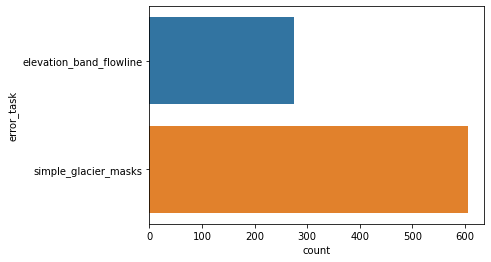

0.047088243379428685


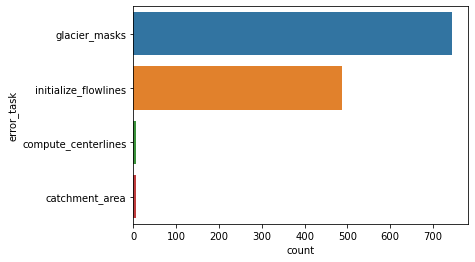

0.11533941583304666


In [11]:
dfserr = []

for exp in ['elev_bands', 'centerlines']:  # 

    fd = f'{dd}/{exp}/RGI62/b_{border:03d}/L2/summary/'
    fs = glob.glob(fd+'glacier_sthttps://cluster.klima.uni-bremen.de/data/gdirs/dems_v2/defaultatistics*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [14]:
dfserr[0].head()

rgi_area_km2               error_task  \
rgi_id                                                  
RGI60-10.00002        48.144     simple_glacier_masks   
RGI60-10.00006        12.966     simple_glacier_masks   
RGI60-12.01364         9.250     simple_glacier_masks   
RGI60-19.01402         7.482  elevation_band_flowline   
RGI60-19.01367         7.271  elevation_band_flowline   

                                                        error_msg  
rgi_id                                                             
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-10.00006  GeometryError: RGI60-10.00006 is a nominal gla...  
RGI60-12.01364  GeometryError: RGI60-12.01364 is a nominal gla...  
RGI60-19.01402  InvalidDEMError: (RGI60-19.01402) DEM altidude...  
RGI60-19.01367  InvalidDEMError: (RGI60-19.01367) DEM altidude...

In [15]:
dfserr[1].head()

rgi_area_km2            error_task  \
rgi_id                                               
RGI60-19.01521        94.963  initialize_flowlines   
RGI60-10.00002        48.144         glacier_masks   
RGI60-04.06184        40.934  initialize_flowlines   
RGI60-03.04079        35.752  initialize_flowlines   
RGI60-14.01649        30.795        catchment_area   

                                                        error_msg  
rgi_id                                                             
RGI60-19.01521  RuntimeError: Altitude range of main flowline ...  
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-04.06184                                   AssertionError:   
RGI60-03.04079  RuntimeError: Altitude range of main flowline ...  
RGI60-14.01649  ValueError: no minimum-cost path was found to ...

## L5 files - CRU ERA5

In [19]:
dd = '../L3-L5_files/'

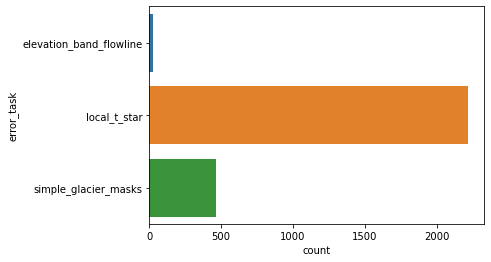

2.4605720835793683


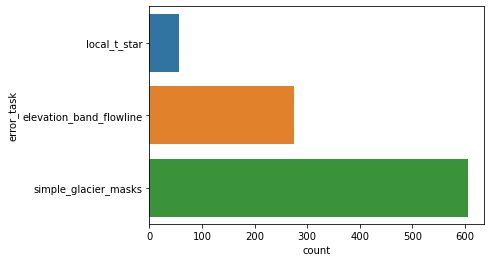

0.1445194456509166


In [25]:
dfserr = []

border = 160

exp = 'elev_bands'
# exp = 'centerlines'

match = 'no_match'

pcps = ['pcp2.5', 'pcp1.6']
clims = ['CRU', 'ERA5']

for pcp, clim in zip(pcps, clims):  # 

    fd = f'{dd}/{clim}/{exp}/qc3/{pcp}/{match}/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) >= 18
    
    fs = fs[:18]
    assert len(fs) == 18
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [26]:
dfserr[0].head()

rgi_area_km2    error_task  \
rgi_id                                       
RGI60-17.15808       721.950  local_t_star   
RGI60-17.15897       428.505  local_t_star   
RGI60-05.10735       392.607  local_t_star   
RGI60-05.10634       388.067  local_t_star   
RGI60-05.10617       373.290  local_t_star   

                                                        error_msg  
rgi_id                                                             
RGI60-17.15808  MassBalanceCalibrationError: RGI60-17.15808: m...  
RGI60-17.15897  MassBalanceCalibrationError: RGI60-17.15897: m...  
RGI60-05.10735  MassBalanceCalibrationError: RGI60-05.10735: m...  
RGI60-05.10634  MassBalanceCalibrationError: RGI60-05.10634: m...  
RGI60-05.10617  MassBalanceCalibrationError: RGI60-05.10617: m...

## L5 files - ERA5 different setups

In [38]:
dd = '../L3-L5_files/'

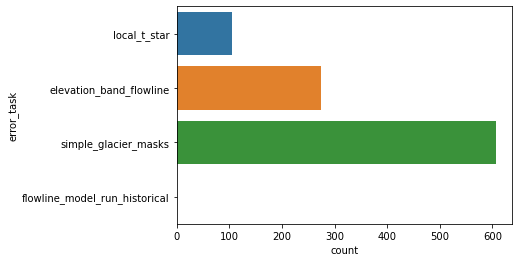

0.16194476100160304


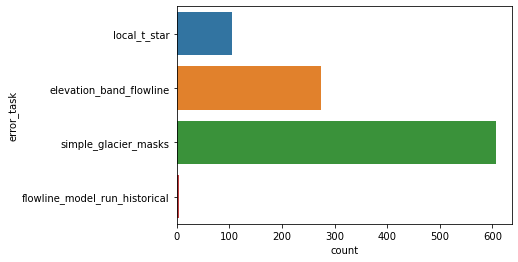

0.162186493498008


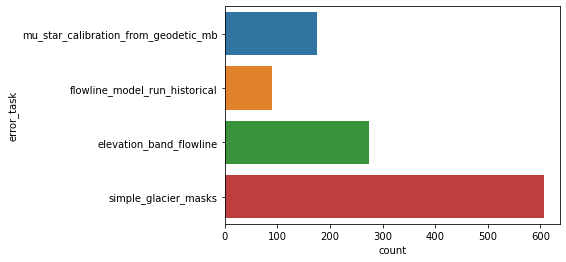

0.08344702128829559


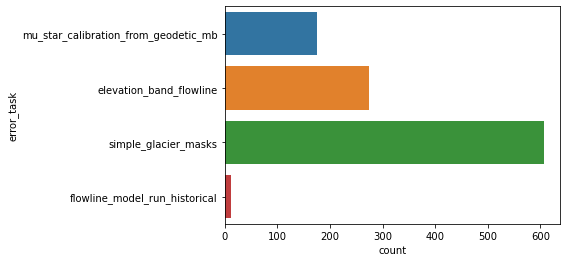

0.2597048682566963


In [39]:
dfserr = []

border = 160

exp = 'elev_bands'



pcp = 'pcp1.6'
clim = 'ERA5'

for match in ['no_match', 'match_geod', 'match_geod_pergla', 'match_geod_pergla_massredis']:  # 

    fd = f'{dd}/{clim}/{exp}/qc3/{pcp}/{match}/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [40]:
dfserr[-1].head()

rgi_area_km2                            error_task  \
rgi_id                                                               
RGI60-19.00432      1081.087         flowline_model_run_historical   
RGI60-19.01299       130.554         flowline_model_run_historical   
RGI60-10.00002        48.144                  simple_glacier_masks   
RGI60-19.01259        47.217  mu_star_calibration_from_geodetic_mb   
RGI60-19.02147        34.342  mu_star_calibration_from_geodetic_mb   

                                                        error_msg  
rgi_id                                                             
RGI60-19.00432  RuntimeError: Glacier exceeds domain boundarie...  
RGI60-19.01299  RuntimeError: Glacier exceeds domain boundarie...  
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-19.01259  MassBalanceCalibrationError: We could not find...  
RGI60-19.02147  MassBalanceCalibrationError: We could not find...

In [17]:
fd

'../L1-L2_files/CRU/elev_bands/qc3/pcp2.5/no_match/RGI62/b_160/L5/summary/'

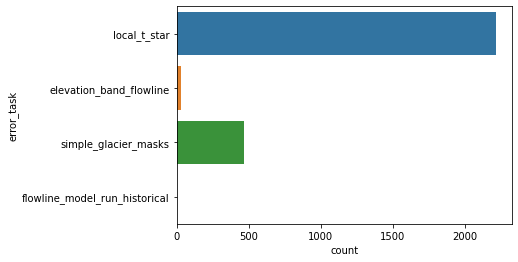

2.438449673256872


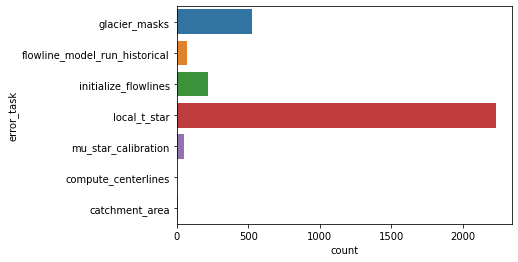

3.234742981390701


In [4]:


dfserr = []

for exp in ['elev_bands', 'centerlines']:  # 

    fd = f'CRU/{exp}/qc3/pcp2.5/no_match/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) == 18
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [5]:
dfserr[0]

rgi_area_km2    error_task  \
rgi_id                                       
RGI60-17.15808       721.950  local_t_star   
RGI60-17.15897       428.505  local_t_star   
RGI60-05.10735       392.607  local_t_star   
RGI60-05.10634       388.067  local_t_star   
RGI60-05.10617       373.290  local_t_star   
RGI60-05.10762       309.061  local_t_star   
RGI60-17.15898       268.749  local_t_star   
RGI60-05.10988       207.766  local_t_star   
RGI60-05.10959       183.850  local_t_star   
RGI60-05.11001       182.955  local_t_star   
RGI60-05.10885       170.533  local_t_star   
RGI60-05.10615       167.934  local_t_star   
RGI60-05.10756       167.501  local_t_star   
RGI60-05.10473       164.013  local_t_star   
RGI60-05.10769       161.792  local_t_star   

                                                        error_msg  
rgi_id                                                             
RGI60-17.15808  MassBalanceCalibrationError: RGI60-17.15808: m...  
RGI60-17.15897  MassBalanceCalibrationError: RGI60-17.15897: m...  
RGI60-05.10735  MassBalanceCalibrationError: RGI60-05.10735: m...  
RGI60-05.10634  MassBalanceCalibrationError: RGI60-05.10634: m...  
RGI60-05.10617  MassBalanceCalibrationError: RGI60-05.10617: m...  
RGI60-05.10762  MassBalanceCalibrationError: RGI60-05.10762: m...  
RGI60-17.15898  MassBalanceCalibrationError: RGI60-17.15898: m...  
RGI60-05.10988  MassBalanceCalibrationError: RGI60-05.10988: m...  
RGI60-05.10959  MassBalanceCalibrationError: RGI60-05.10959: m...  
RGI60-05.11001  MassBalanceCalibrationError: RGI60-05.11001: m...  
RGI60-05.10885  MassBalanceCalibrationError: RGI60-05.10885: m...  
RGI60-05.10615  MassBalanceCalibrationError: RGI60-05.10615: m...  
RGI60-05.10756  MassBalanceCalibrationError: RGI60-05.10756: m...  
RGI60-05.10473  MassBalanceCalibrationError: RGI60-05.10473: m...  
RGI60-05.10769  MassBalanceCalibrationError: RGI60-05.10769: m...

In [6]:
dfserr[1]

rgi_area_km2                     error_task  \
rgi_id                                                        
RGI60-17.15804       790.282            mu_star_calibration   
RGI60-17.15808       721.950                   local_t_star   
RGI60-13.54431       663.729  flowline_model_run_historical   
RGI60-17.15897       428.505                   local_t_star   
RGI60-05.10735       392.607                   local_t_star   
RGI60-05.10634       388.067                   local_t_star   
RGI60-05.10617       373.290                   local_t_star   
RGI60-05.10762       309.061                   local_t_star   
RGI60-05.10748       289.188                   local_t_star   
RGI60-13.43483       282.721  flowline_model_run_historical   
RGI60-17.15898       268.749                   local_t_star   
RGI60-01.16377       254.841  flowline_model_run_historical   
RGI60-05.10988       207.766                   local_t_star   
RGI60-14.04404       203.336  flowline_model_run_historical   
RGI60-05.10959       183.850                   local_t_star   

                                                        error_msg  
rgi_id                                                             
RGI60-17.15804  MassBalanceCalibrationError: RGI60-17.15804 mu...  
RGI60-17.15808  MassBalanceCalibrationError: RGI60-17.15808: m...  
RGI60-13.54431  RuntimeError: CFL error: required time step sm...  
RGI60-17.15897  MassBalanceCalibrationError: RGI60-17.15897: m...  
RGI60-05.10735  MassBalanceCalibrationError: RGI60-05.10735: m...  
RGI60-05.10634  MassBalanceCalibrationError: RGI60-05.10634: m...  
RGI60-05.10617  MassBalanceCalibrationError: RGI60-05.10617: m...  
RGI60-05.10762  MassBalanceCalibrationError: RGI60-05.10762: m...  
RGI60-05.10748  MassBalanceCalibrationError: RGI60-05.10748: m...  
RGI60-13.43483  RuntimeError: CFL error: required time step sm...  
RGI60-17.15898  MassBalanceCalibrationError: RGI60-17.15898: m...  
RGI60-01.16377  RuntimeError: CFL error: required time step sm...  
RGI60-05.10988  MassBalanceCalibrationError: RGI60-05.10988: m...  
RGI60-14.04404  RuntimeError: CFL error: required time step sm...  
RGI60-05.10959  MassBalanceCalibrationError: RGI60-05.10959: m...

## Quick check area volume 

In [102]:
fd = f'ERA5/elev_bands/qc3/pcp1.6/no_match/RGI62/b_080/L5/summary/glacier_statistics_11.csv'
df = pd.read_csv(fd, index_col=0, low_memory=False)

In [103]:
fd = f'ERA5/elev_bands/qc3/pcp1.6/no_match/RGI62/b_080/L5/summary/historical_run_output_extended_11.nc'
ds = xr.open_dataset(fd)

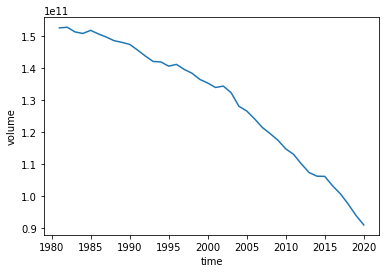

In [104]:
ds.volume.sum(dim='rgi_id').plot();

In [105]:
check = ds.area.isel(time=0).to_dataframe()[['area']]

In [106]:
check['area_rgi'] = df.rgi_area_km2 * 1e6
check['year_rgi'] = df.rgi_year

In [107]:
check = check.dropna()

In [108]:
check.sum()

area        2.091955e+09
area_rgi    2.091980e+09
year_rgi    7.862529e+06
dtype: float64

In [109]:
check.loc[~ np.isclose(check.area_rgi, check.area)]

area   area_rgi  year_rgi
rgi_id                                           
RGI60-11.00004  5.283319e+04    53000.0      2003
RGI60-11.00028  3.803987e+05   381000.0      2003
RGI60-11.00085  4.176507e+04    42000.0      2003
RGI60-11.00138  2.786290e+04    28000.0      2003
RGI60-11.00174  9.278241e+04    93000.0      2003
...                      ...        ...       ...
RGI60-11.03851  2.177771e+04    22000.0      2007
RGI60-11.03858  3.782550e+04    38000.0      2007
RGI60-11.03887  1.278531e+06  1279000.0      2003
RGI60-11.03911  2.285273e+04    23000.0      2009
RGI60-11.03915  2.976105e+04    30000.0      2009

[125 rows x 3 columns]

In [41]:
fd = f'CRU/centerlines/qc3/pcp2.5/no_match/RGI62/b_080/L3/summary/'
fs = glob.glob(fd+'glacier_statistics*.csv')
assert len(fs) == 17

In [42]:
df = []
for f in fs:
    df.append(pd.read_csv(f, index_col=0, low_memory=False))
df = pd.concat(df).sort_index()

In [45]:
dfv = df[['inv_volume_km3']].dropna()

In [46]:
df_ref = pd.read_hdf(utils.get_demo_file('rgi62_itmix_df.h5'))

In [49]:
dfv['ref'] = df_ref.loc[dfv.index]['vol_itmix_m3'] * 1e-9

In [51]:
dfv.sum()

inv_volume_km3    105450.670375
ref               105451.334906
dtype: float64

In [52]:
len(dfv)

156368